<a href="https://colab.research.google.com/github/VishalIITP/MangoLeafDiseaseDetection/blob/main/mangoLeafDiseaseDetectino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.layers import Conv2D,UpSampling2D,MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array,load_img
from skimage.color import rgb2lab,lab2rgb

from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import tensorflow as tf
import os

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
path = "/content/gdrive/MyDrive/Collab/mangoLeafDiseaseDetection/Dataset"

In [6]:
SIZE = 256
SEED_TRAINING = 121
SEED_TESTING = 197
SEED_VALIDATION = 164
CHANNELS = 3
n_classes = 8
EPOCHS = 50
BATCH_SIZE = 16
input_shape = (SIZE, SIZE, CHANNELS)

IMG_SHAPE  = 256

In [7]:
#image agumentation
from keras.preprocessing.image import ImageDataGenerator
image_gen_train = ImageDataGenerator(
      rescale=1./255,#rescaling
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      featurewise_center =True,#standardization
      featurewise_std_normalization = True,
      validation_split=0.2)

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=path,
                                                     shuffle=True,
                                                     color_mode = 'rgb',# color
                                                     class_mode='categorical',
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     subset='training')
train_data_valid = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=path,
                                                      shuffle=True,
                                                     color_mode = 'rgb',# color
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='categorical',
                                                     subset='validation')


Found 3200 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


In [8]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1872: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


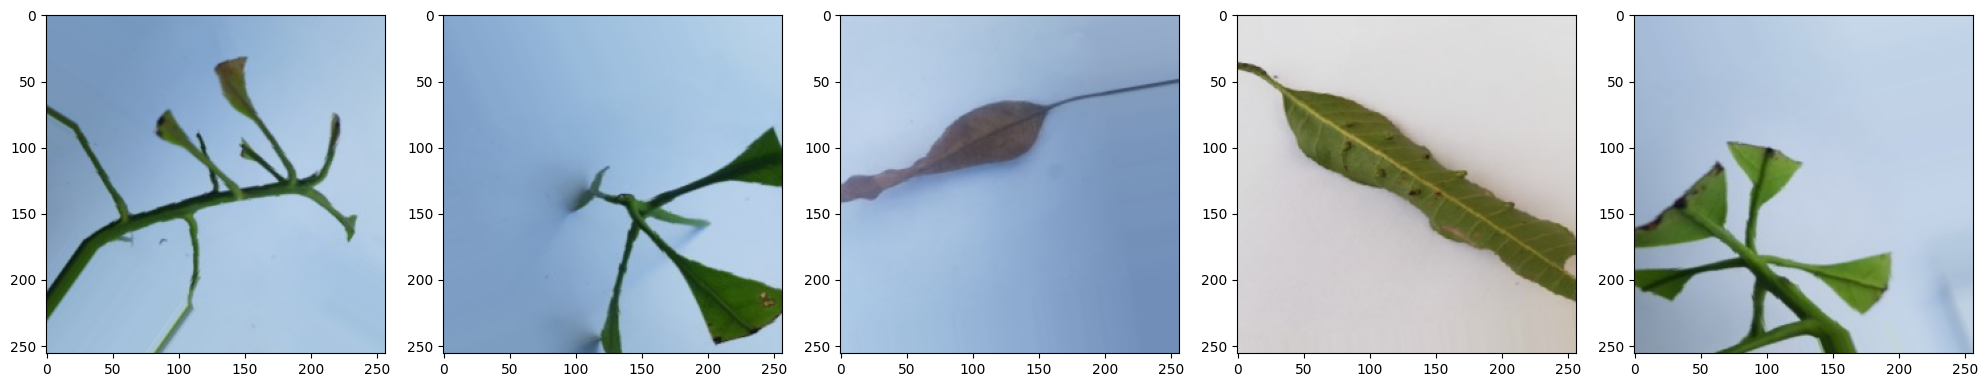

In [9]:
import matplotlib.pyplot as plt
augmented_images = [train_data_gen[0][0][i] for i in range(5)]
plotImages(augmented_images)

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [11]:
# from keras import Sequential
from keras import layers

model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu',input_shape=(IMG_SHAPE,IMG_SHAPE,3)),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(8, activation='softmax')
])

In [12]:
# metrics1=tf.keras.metrics.Precision(name='precision')
# metrics3=tf.keras.metrics.Recall(name='Recall')
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
history = model.fit(train_data_gen,validation_data=train_data_valid,
                              steps_per_epoch = train_data_gen.samples // BATCH_SIZE,
                              validation_steps = train_data_valid.samples // BATCH_SIZE,
                              epochs=30)

Epoch 1/30
200/200 [==============================] - 1023s 5s/step - loss: 1.9840 - accuracy: 0.2025 - val_loss: 1.7915 - val_accuracy: 0.2087
Epoch 2/30
200/200 [==============================] - 75s 375ms/step - loss: 1.6891 - accuracy: 0.2731 - val_loss: 1.6024 - val_accuracy: 0.3063
Epoch 3/30
200/200 [==============================] - 72s 360ms/step - loss: 1.4981 - accuracy: 0.3591 - val_loss: 1.5657 - val_accuracy: 0.3800
Epoch 4/30
200/200 [==============================] - 81s 406ms/step - loss: 1.4354 - accuracy: 0.3750 - val_loss: 1.5171 - val_accuracy: 0.4200
Epoch 5/30
200/200 [==============================] - 74s 373ms/step - loss: 1.3750 - accuracy: 0.4391 - val_loss: 1.3995 - val_accuracy: 0.4487
Epoch 6/30
200/200 [==============================] - 72s 359ms/step - loss: 1.2220 - accuracy: 0.5041 - val_loss: 1.3571 - val_accuracy: 0.4425
Epoch 7/30
200/200 [==============================] - 81s 404ms/step - loss: 1.1361 - accuracy: 0.5716 - val_loss: 1.3461 - val_acc

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [15]:
model.save('/content/gdrive/MyDrive/Collab/mangoLeafDiseaseDetection/TrainedModel/trModelLsize.keras')

In [16]:
from keras import models
model2=models.load_model('/content/gdrive/MyDrive/Collab/mangoLeafDiseaseDetection/TrainedModel/trModelLsize.keras')

In [17]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [18]:
import random

image_path='/content/gdrive/MyDrive/Collab/mangoLeafDiseaseDetection/Dataset/'

random_folder=random.choice(os.listdir(image_path))
print(random_folder)

random_file=random.choice(os.listdir(image_path+random_folder))
print(random_file)


Cutting Weevil
20211011_161909 (Custom) (Custom).jpg


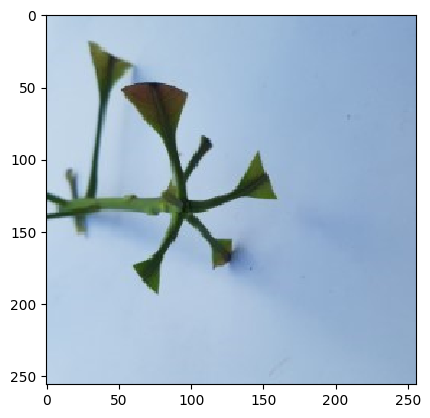

1/1 [==============================] - 0s 233ms/step


array([[1.1813630e-05, 3.4195140e-17, 9.9998820e-01, 2.2283794e-08,
        2.3054842e-26, 3.3064930e-30, 3.1533422e-17, 4.5867692e-26]],
      dtype=float32)

In [19]:
# from PIL import Image
# img = Image.open(path2) # image extension *.png,*.jpg
# img = img.resize((new_width, new_height), Image.ANTIALIAS)
from matplotlib import pyplot as plt

path2=image_path+random_folder+'/'+random_file
# path2="/content/gdrive/MyDrive/Collab/mangoLeafDiseaseDetection/TestImages/anthracnose.jpeg"

test = tf.keras.utils.load_img(path2,color_mode = 'rgb',target_size=(IMG_SHAPE,IMG_SHAPE))
input_arr = tf.keras.utils.img_to_array(test)
input_arr=input_arr/255

plt.imshow(input_arr, interpolation='nearest')
plt.show()

input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)

predictions

In [20]:
ref=train_data_gen.class_indices
ref_list=list(ref.keys())
# print(ref_list)

for item in predictions:
  output_list=item.tolist()
max_element=max(output_list)
for i in range(len(output_list)):
  if max_element==output_list[i]:
    print(ref_list[i])



Cutting Weevil


In [22]:
# from keras.callbacks import EarlyStopping
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import GridSearchCV
# # define the model architecture


# def create_model(learning_rate=0.001, dropout_rate=0.25):
#     model = Sequential([
#         layers.Rescaling(1./255),
#         layers.Conv2D(16, 3, padding='same', activation='relu'),
#         layers.MaxPooling2D(),

#         layers.Conv2D(32, 3, padding='same', activation='relu'),
#         layers.MaxPooling2D(),
#         layers.Dropout(dropout_rate),

#         layers.Conv2D(64, 3, padding='same', activation='relu'),
#         layers.MaxPooling2D(),
#         layers.Dropout(dropout_rate),

#         layers.Conv2D(128, 3, padding='same', activation='relu'),
#         layers.MaxPooling2D(),
#         layers.Dropout(dropout_rate),

#         layers.Flatten(),
#         layers.Dense(256, activation='relu'),
#         layers.Dense(8, activation='softmax')
#     ])
#     optimizer = Adam(lr=learning_rate)
#     model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
#     return model

# # set the hyperparameters
# param_grid = {
#     'learning_rate': [0.1, 0.01, 0.001],
#     'dropout_rate': [0.1, 0.25, 0.5]
# }
# batch_size = 32
# epochs = 10

# # create the KerasClassifier for GridSearchCV
# model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=0)

# # create early stopping callback
# early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

# # perform GridSearchCV to tune hyperparameters
# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
# grid_result = grid.fit(train_generator, validation_data=validation_generator, callbacks=[early_stopping])

# # print the best hyperparameters
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


In [23]:
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.preprocessing.image import load_img, img_to_array

# # Define the directories and parameters
# data_dir = "/content/gdrive/My Drive/data mining/archive"
# img_size = (240, 320)

# # Load the data
# labels = os.listdir(os.path.join(data_dir))
# X_train, y_train = [], []
# X_val, y_val = [], []
# X_test, y_test = [], []
# for label in labels:
#     for img_name in os.listdir(os.path.join(data_dir, label)):
#         img_path = os.path.join(data_dir, label, img_name)
#         img = load_img(img_path, target_size=img_size)
#         X_train.append(img_to_array(img))
#         y_train.append(label)
#     for img_name in os.listdir(os.path.join(data_dir, label)):
#         img_path = os.path.join(data_dir, 'val', label, img_name)
#         img = load_img(img_path, target_size=img_size)
#         X_val.append(img_to_array(img))
#         y_val.append(label)
#     for img_name in os.listdir(os.path.join(data_dir, label)):
#         img_path = os.path.join(data_dir, 'test', label, img_name)
#         img = load_img(img_path, target_size=img_size)
#         X_test.append(img_to_array(img))
#         y_test.append(label)

# X_train = np.array(X_train)
# y_train = np.array(y_train)
# X_val = np.array(X_val)
# y_val = np.array(y_val)
# X_test = np.array(X_test)
# y_test = np.array(y_test)

# # Preprocess the data
# X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
# X_val = X_val.reshape(X_val.shape[0], -1) / 255.0
# X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# # Encode the labels
# label_encoder = LabelEncoder()
# y_train = label_encoder.fit_transform(y_train)
# y_val = label_encoder.transform(y_val)
# y_test = label_encoder.transform(y_test)

# # Train and evaluate the Naive Bayes model
# from sklearn.naive_bayes import GaussianNB
# nb = GaussianNB()
# nb.fit(X_train, y_train)
# nb_acc = nb.score(X_test, y_test)
# print("Naive Bayes accuracy:", nb_acc)

# # Train and evaluate the K-Nearest Neighbors model
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train, y_train)
# knn_acc = knn.score(X_test, y_test)
# print("K-Nearest Neighbors accuracy:", knn_acc)

# # Train and evaluate the Support Vector Machine model
# from sklearn.svm import SVC
# svm = SVC(kernel='linear', C=1, random_state=0)
# svm.fit(X_train, y_train)
# svm_acc = svm.score(X_test, y_test)
# print("Support Vector Machine accuracy:", svm_acc)

# # Train and evaluate the Random Forest model
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_estimators=100, random_state=0)
# rf.fit(X_train, y_train)
# rf_acc = rf.score(X_test, y_test)
# print("Random Forest accuracy:", rf_acc)

# # Train and evaluate the Logistic Regression model
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression(random_state=0)
# lr.fit(X_train, y_train)
# lr_acc = lr.score(X_test, y_test)
# print("Logistic Regression accuracy:", lr_acc)

# # Train and evaluate the Decision Tree model
# dt = DecisionTreeClassifier(random_state=0)
# dt.fit(X_train, y_train)
# dt_acc = dt.score(X_test, y_test)
# print("Decision Tree accuracy:", dt_acc)

# # Add the accuracy scores for logistic regression and decision tree to the accuracies dictionary
# accuracies['Logistic Regression'] = lr_acc
# accuracies['Decision Tree'] = dt_acc


# # Create a dictionary to store the accuracies of all models
# accuracies = {'Logistic Regression': lr_acc, 'Decision Tree': dt_acc, 'Naive Bayes': nb_acc, 'K-Nearest Neighbors': knn_acc, 'Support Vector Machine': svm_acc, 'Random Forest': rf_acc}

# # Print the accuracies of all models
# print("Model Accuracies:")
# for model, acc in accuracies.items():
#     print(model + ":", acc)

In [24]:
# path='/content/gdrive/MyDrive/Collab/mangoLeafDiseaseDetection/Dataset/Anthracnose/20211008_124249 (Custom).jpg'
# test =tf.keras.utils.load_img(path)

# test_out=model.predict(test)

In [25]:
# !pip install --upgrade keras scikit-learn


In [26]:
# !pip install scikeras

In [27]:
 # from keras.callbacks import EarlyStopping
# # from keras.wrappers.scikit_learn import KerasClassifier
# from scikeras.wrappers import KerasClassifier
# from sklearn.model_selection import GridSearchCV
# import tensorflow as tf
# from keras.optimizers import Adam
# # define the model architecture


# def create_model(learning_rate=0.001, dropout_rate=0.25):
#     model = Sequential([
#         layers.Rescaling(1./255),
#         layers.Conv2D(16, 3, padding='same', activation='relu'),
#         layers.MaxPooling2D(),

#         layers.Conv2D(32, 3, padding='same', activation='relu'),
#         layers.MaxPooling2D(),
#         layers.Dropout(dropout_rate),

#         layers.Conv2D(64, 3, padding='same', activation='relu'),
#         layers.MaxPooling2D(),
#         layers.Dropout(dropout_rate),

#         layers.Conv2D(128, 3, padding='same', activation='relu'),
#         layers.MaxPooling2D(),
#         layers.Dropout(dropout_rate),

#         layers.Flatten(),
#         layers.Dense(256, activation='relu'),
#         layers.Dense(8, activation='softmax')
#     ])
#     optimizer = Adam(lr=learning_rate)
#     model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
#     return model

# # set the hyperparameters
# param_grid = {
#     'learning_rate': [0.1, 0.01, 0.001],
#     'dropout_rate': [0.1, 0.25, 0.5]
# }
# batch_size = 32
# epochs = 10

# # create the KerasClassifier for GridSearchCV
# model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=0)

# # create early stopping callback
# early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

# # perform GridSearchCV to tune hyperparameters
# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
# grid_result = grid.fit(train_generator, validation_generator, callbacks=[early_stopping])

# # print the best hyperparameters
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


In [28]:
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from keras.preprocessing.image import load_img, img_to_array

# # Define the directories and parameters
# data_dir = "/content/gdrive/MyDrive/Collab/mangoLeafDiseaseDetection/Dataset"
# img_size = (240, 320)

# # Load the data
# labels = os.listdir(os.path.join(data_dir))
# X_train, y_train = [], []
# X_val, y_val = [], []
# X_test, y_test = [], []
# for label in labels:
#     for img_name in os.listdir(os.path.join(data_dir, label)):
#         img_path = os.path.join(data_dir, label, img_name)
#         img = load_img(img_path, target_size=img_size)
#         X_train.append(img_to_array(img))
#         y_train.append(label)
#     for img_name in os.listdir(os.path.join(data_dir, label)):
#         img_path = os.path.join(data_dir, 'val', label, img_name)
#         img = load_img(img_path, target_size=img_size)
#         X_val.append(img_to_array(img))
#         y_val.append(label)
#     for img_name in os.listdir(os.path.join(data_dir, label)):
#         img_path = os.path.join(data_dir, 'test', label, img_name)
#         img = load_img(img_path, target_size=img_size)
#         X_test.append(img_to_array(img))
#         y_test.append(label)

# X_train = np.array(X_train)
# y_train = np.array(y_train)
# X_val = np.array(X_val)
# y_val = np.array(y_val)
# X_test = np.array(X_test)
# y_test = np.array(y_test)

# # Preprocess the data
# X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
# X_val = X_val.reshape(X_val.shape[0], -1) / 255.0
# X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# # Encode the labels
# label_encoder = LabelEncoder()
# y_train = label_encoder.fit_transform(y_train)
# y_val = label_encoder.transform(y_val)
# y_test = label_encoder.transform(y_test)

# # Train and evaluate the Naive Bayes model
# from sklearn.naive_bayes import GaussianNB
# nb = GaussianNB()
# nb.fit(X_train, y_train)
# nb_acc = nb.score(X_test, y_test)
# print("Naive Bayes accuracy:", nb_acc)

# # Train and evaluate the K-Nearest Neighbors model
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train, y_train)
# knn_acc = knn.score(X_test, y_test)
# print("K-Nearest Neighbors accuracy:", knn_acc)

# # Train and evaluate the Support Vector Machine model
# from sklearn.svm import SVC
# svm = SVC(kernel='linear', C=1, random_state=0)
# svm.fit(X_train, y_train)
# svm_acc = svm.score(X_test, y_test)
# print("Support Vector Machine accuracy:", svm_acc)

# # Train and evaluate the Random Forest model
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_estimators=100, random_state=0)
# rf.fit(X_train, y_train)
# rf_acc = rf.score(X_test, y_test)
# print("Random Forest accuracy:", rf_acc)

# # Train and evaluate the Logistic Regression model
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression(random_state=0)
# lr.fit(X_train, y_train)
# lr_acc = lr.score(X_test, y_test)
# print("Logistic Regression accuracy:", lr_acc)

# # Train and evaluate the Decision Tree model
# dt = DecisionTreeClassifier(random_state=0)
# dt.fit(X_train, y_train)
# dt_acc = dt.score(X_test, y_test)
# print("Decision Tree accuracy:", dt_acc)

# # Add the accuracy scores for logistic regression and decision tree to the accuracies dictionary
# accuracies['Logistic Regression'] = lr_acc
# accuracies['Decision Tree'] = dt_acc


# # Create a dictionary to store the accuracies of all models
# accuracies = {'Logistic Regression': lr_acc, 'Decision Tree': dt_acc, 'Naive Bayes': nb_acc, 'K-Nearest Neighbors': knn_acc, 'Support Vector Machine': svm_acc, 'Random Forest': rf_acc}

# # Print the accuracies of all models
# print("Model Accuracies:")
# for model, acc in accuracies.items():
#     print(model + ":", acc)